In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import matplotlib.pyplot as plt
# from ipywidgets import *

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn import neighbors, clone


from pyfrechet.metric_spaces import MetricData, Sphere, Euclidean, Torus
# from pyfrechet.regression.frechet_regression import LocalFrechet, GlobalFrechet
# from pyfrechet.regression.kernels import NadarayaWatson, gaussian, epanechnikov
# from pyfrechet.regression.knn import KNearestNeighbours
from pyfrechet.regression.bagged_regressor import BaggedRegressor
from pyfrechet.regression.trees import Tree
from pyfrechet.metrics import mse

INFO: Using numpy backend


# Sphere


In [12]:

M = Sphere(2)
m = lambda x: 5 + 5*x[:,0]**2 + np.sin(20 * x[:,0]) - 10*x[:,0]**3 

def gen_data(N, eps=0.1):
    # Univariate predictor in [0,1]
    x = np.random.rand(N*1).reshape((N,1))
    theta = m(x) + eps*np.random.randn(N)
    y = np.c_[np.cos(theta), np.sin(theta)]
    return x, MetricData(M, y)

N = 500; eps = 0.5
X, y = gen_data(N, eps)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [18]:
y.data

array([[ 0.41703388, -0.90889094],
       [ 0.99194342,  0.12668167],
       [ 0.00846944, -0.99996413],
       [-0.80146349,  0.5980437 ],
       [ 0.50487394, -0.86319309],
       [-0.92940231, -0.36906821],
       [ 0.82338257, -0.56748669],
       [ 0.49916136, -0.86650905],
       [-0.99999497, -0.00317133],
       [ 0.46973079, -0.88280971],
       [-0.57507838, -0.81809832],
       [ 0.02427122, -0.99970541],
       [-0.88436813, -0.46679012],
       [-0.63270931, -0.77438939],
       [-0.44147979, -0.89727119],
       [-0.56933249, -0.82210736],
       [-0.95312646,  0.30257222],
       [ 0.68298991, -0.73042781],
       [ 0.47657856,  0.87913189],
       [ 0.55999499, -0.82849599],
       [ 0.65101079, -0.75906847],
       [ 0.80373686, -0.59498493],
       [-0.9870569 , -0.16037046],
       [-0.53458912, -0.8451121 ],
       [-0.44027401, -0.89786346],
       [-0.79931029, -0.60091852],
       [-0.26603387, -0.96396368],
       [ 0.58683123, -0.80970927],
       [ 0.21764647,

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

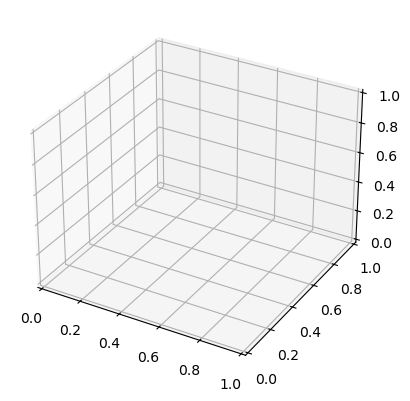

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


grid=np.linspace(0,1,100)
grid_m=5 + 5*grid**2 + np.sin(20 * grid) - 10*grid**3
grid_y=np.c_[np.cos(grid_m), np.sin(grid_m)]

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(grid_y, grid_y[:,0], grid_m[:,1])
plt.show()

In [21]:
grid_m.shape

NameError: name 'grid_m' is not defined

In [5]:
Base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=5)
Forest = BaggedRegressor(estimator=Base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=-2)
Forest.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  3.0min finished


BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(split_type='2means'))

In [6]:
Forest_predictions = Forest.predict(X_test)

In [7]:
print(f'MSE: {mse(y_test, Forest_predictions)}')

MSE: 0.276405849698628


In [8]:
# Checking if bootstrap samples with replacement are correct
print(X_train.shape)
print(Forest.estimators[0][0].shape)
print(np.unique(Forest.estimators[0][0], return_counts=True))
print(np.unique(Forest.estimators[0][0], return_counts=False).shape)

(400, 1)
(400,)
(array([  0,   1,   2,   3,   5,   7,   8,  11,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,  34,
        35,  36,  38,  39,  40,  42,  43,  45,  46,  47,  48,  49,  52,
        53,  55,  56,  58,  62,  63,  65,  66,  67,  70,  71,  72,  73,
        75,  77,  78,  80,  82,  83,  84,  85,  86,  87,  88,  90,  92,
        93,  95,  97,  98,  99, 101, 105, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 122, 123, 125, 128, 129, 131,
       132, 135, 136, 137, 140, 143, 144, 145, 146, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 163, 164, 166, 169, 170,
       171, 172, 173, 175, 176, 177, 178, 179, 183, 184, 185, 189, 190,
       194, 196, 197, 198, 199, 200, 202, 203, 205, 206, 208, 209, 212,
       213, 214, 215, 216, 218, 219, 223, 225, 226, 227, 228, 229, 230,
       232, 233, 237, 238, 239, 240, 242, 246, 250, 254, 255, 256, 257,
       261, 263, 264, 265, 269, 271, 273, 274, 

In [9]:
type(Forest.estimators[0][0])

numpy.ndarray

In [10]:
Forest._oob_predict_one(X_train[10].reshape(-1,1))

array([-0.58685514,  0.80969195])

In [11]:
prueba=Forest.oob_predict(X_train)
prueba.data

array([[ 1.44736633e-01, -9.89470215e-01],
       [ 9.99698977e-01, -2.45347826e-02],
       [-9.94762252e-01,  1.02215763e-01],
       [ 9.94400647e-01, -1.05675698e-01],
       [-6.27250861e-01, -7.78817281e-01],
       [-3.46109459e-01, -9.38194139e-01],
       [ 8.41675018e-01, -5.39984411e-01],
       [ 1.99759624e-01, -9.79844933e-01],
       [-2.55246916e-01, -9.66875903e-01],
       [ 8.90749846e-01, -4.54493907e-01],
       [-5.86855136e-01,  8.09691948e-01],
       [ 1.56778661e-01,  9.87633764e-01],
       [ 9.08679724e-01, -4.17493903e-01],
       [-5.50844765e-01, -8.34607719e-01],
       [ 7.17369715e-01,  6.96692681e-01],
       [-5.64906576e-01, -8.25154871e-01],
       [ 5.85517685e-01, -8.10659633e-01],
       [ 9.99961319e-01, -8.79545223e-03],
       [-5.70857530e-01, -8.21049134e-01],
       [ 7.63730987e-01, -6.45534646e-01],
       [ 8.36894951e-01, -5.47363536e-01],
       [ 6.11016470e-01,  7.91617883e-01],
       [ 5.25610992e-01, -8.50725035e-01],
       [ 9.

In [13]:
# OOB "prediction error (distance)"
print(prueba.M.d(prueba.data, y_train.data).shape)
(prueba.M.d(prueba.data, y_train.data)**2).mean()

(400,)


0.2731211647021828

In [14]:
type(y_train)

pyfrechet.metric_spaces.metric_data.MetricData

In [15]:
# OOB prediction errors
Forest.oob_errors()

array([7.33005940e-01, 2.05719650e-01, 1.32787620e-01, 1.49800230e-01,
       6.24757111e-01, 3.77984090e-01, 3.32070420e-02, 6.60585839e-01,
       6.82818523e-02, 1.74774033e-01, 8.49952225e-02, 1.18885301e-01,
       5.02792192e-01, 1.09212672e-01, 3.08549668e-01, 8.14320185e-01,
       1.73777046e-01, 4.69668759e-01, 1.18991770e-01, 3.56518982e-01,
       5.98910050e-01, 8.70520151e-02, 8.65701977e-01, 5.18655792e-01,
       7.59183365e-01, 4.48517332e-02, 3.83101326e-01, 8.49183250e-01,
       4.30824654e-01, 9.21229802e-02, 5.78906997e-01, 3.56294576e-01,
       4.16978284e-01, 9.24090721e-01, 1.23114033e-01, 1.15951445e+00,
       7.43496742e-01, 3.99367999e-01, 2.67320024e-01, 1.15732244e-01,
       4.97287166e-01, 8.92577475e-02, 1.96552824e-03, 7.70009013e-01,
       3.25041852e-01, 2.99609391e-01, 6.51427571e-01, 3.61565617e-01,
       3.82739494e-01, 2.21098827e-01, 2.23480802e-01, 4.32033526e-01,
       3.12780258e-02, 7.21372728e-01, 5.91372869e-01, 3.86985644e-01,
      

In [16]:
# Quantile for confidence balls
alpha=0.05
Dalpha=np.percentile(Forest.oob_errors(), (1-alpha)*100)

In [17]:
np.mean(y_train.M.d(Forest_predictions.data, y_test.data) <= Dalpha)

0.97

In [12]:
type(y_train)

pyfrechet.metric_spaces.metric_data.MetricData

# Torus

In [2]:
M=Torus(2)
print(M.__str__())
M

Torus(dim=2)


In [3]:
path='C:/Users/J2404/OneDrive/Documentos/UNIVERSIDAD/MÁSTER/TFM/R (TFM)/'
file_name='T2Data_sample1.csv'
sample1=pd.read_csv(path+file_name)
print(sample1.head())
print(sample1.shape)

    theta.1   theta.2         t    true.1    true.2
0 -0.848080  2.930781  0.011546 -0.819352  2.867161
1 -0.994433  2.776142  0.016183 -0.882500  2.835587
2 -1.078159  2.643660  0.019021 -0.945647  2.804013
3 -0.997648  2.689698  0.019599 -1.008795  2.772440
4 -1.209948  2.813355  0.026728 -1.071942  2.740866
(200, 5)


In [4]:
X=sample1[['t']].values
y=MetricData(M, sample1[['theta.1','theta.2']].values)

In [5]:
def create_T2_grid(R: float, r: float, grid_size: int=200) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    u = np.linspace(0, 2*np.pi, grid_size, endpoint=True)
    v = np.linspace(0, 2*np.pi, grid_size, endpoint=False)
    u, v = np.meshgrid(u, v)

    x_grid = (R + r * np.cos(v)) * np.cos(u)
    y_grid = (R + r * np.cos(v)) * np.sin(u)
    z_grid = r * np.sin(v)

    return (x_grid, y_grid, z_grid)

def angles_to_T2(theta, phi, R: float, r: float) -> tuple:
    x_coord = (R + r * np.cos(theta)) * np.cos(phi)
    y_coord = (R + r * np.cos(theta)) * np.sin(phi)
    z_coord = r * np.sin(theta)

    return (x_coord, y_coord, z_coord)


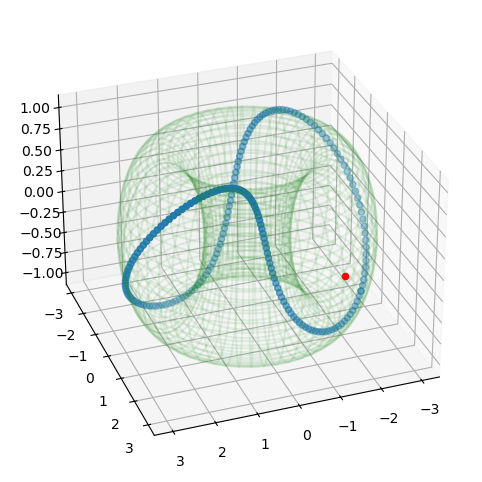

In [6]:
x_grid, y_grid, z_grid = create_T2_grid(R=2, r=1)

# x_coord, y_coord, z_coord=angles_to_T2(y.data[:,0], y.data[:,1], R=2, r=1)

x_coord, y_coord, z_coord=angles_to_T2(sample1[['true.1']].values, sample1[['true.2']].values, R=2, r=1)

fig=plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
ax.scatter3D(x_coord,y_coord,z_coord)
x_mean, y_mean, z_mean=angles_to_T2(y.frechet_mean()[0], y.frechet_mean()[1], R=2, r=1)
ax.scatter(x_mean, y_mean, z_mean, color='red')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='forestgreen', alpha=0.1)
ax.view_init(elev=30, azim=70)
plt.show()

In [7]:
y.frechet_mean()

array([-0.92027162, -3.03868979])

In [8]:
y.compute_distances()

In [9]:
print(y.distances)

[[0.         0.04533224 0.13537478 ... 0.01571386 0.039074   0.00073074]
 [0.04533224 0.         0.02456164 ... 0.11424023 0.08203476 0.04247377]
 [0.13537478 0.02456164 0.         ... 0.24333305 0.15840789 0.13147827]
 ...
 [0.01571386 0.11424023 0.24333305 ... 0.         0.06030491 0.01801416]
 [0.039074   0.08203476 0.15840789 ... 0.06030491 0.         0.04986104]
 [0.00073074 0.04247377 0.13147827 ... 0.01801416 0.04986104 0.        ]]


In [11]:
y.M.d(y.data[1],y.data[150])

3.534756059705017

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=5)
forest = BaggedRegressor(estimator=base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=-2)
forest.fit(X_train, y_train)

BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(split_type='2means'))

In [15]:
forest_predictions = forest.predict(X_test)
print(f'MSE: {mse(y_test, forest_predictions)}')

forest_fitted = forest.predict(X_train)
print(f'MSE: {mse(y_train, forest_fitted)}')

MSE: 0.0971014082258452


MSE: 0.06340082069790456


In [27]:
y0 = forest._predict_one(X_test[0,:])
y0

array([-2.57366409, -1.14528867])

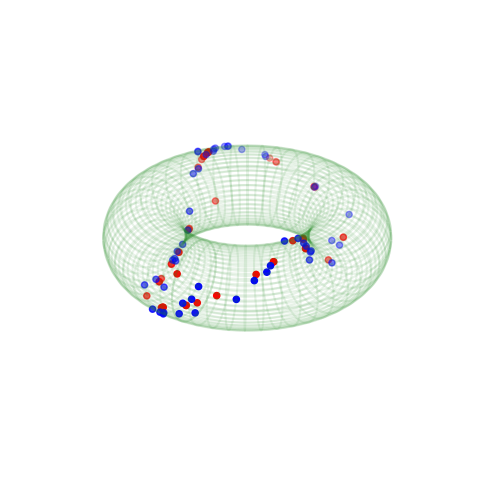

In [61]:
R=2.5; r=1

x_grid, y_grid, z_grid = create_T2_grid(R=R, r=r)
x_coord, y_coord, z_coord=angles_to_T2(forest_predictions.data[:,0], 
                                       forest_predictions.data[:,1], R=R, r=r)

fig=plt.figure(figsize=(12,6))
ax=plt.axes(projection='3d')
ax.scatter3D(x_coord,y_coord,z_coord, color='red', label='Prediction')
x_coord, y_coord, z_coord=angles_to_T2(y_test.data[:,0], y_test.data[:,1], R=R, r=r)
ax.scatter3D(x_coord,y_coord,z_coord, color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='forestgreen', alpha=0.1)
ax.set_box_aspect((np.ptp(x_grid), np.ptp(y_grid), np.ptp(z_grid)))
ax.view_init(elev=30, azim=30)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.axis('off')
plt.show()

In [17]:
oob_preds=forest.oob_predict(X_train)
oob_preds.data

array([[ 2.72477499e+00,  1.50031635e+00],
       [ 1.70775854e+00, -2.07541267e+00],
       [-1.82342128e+00, -7.55192960e-01],
       [ 1.33207464e+00,  7.91844301e-01],
       [ 1.46902337e+00,  8.65884729e-01],
       [-1.20884773e+00,  2.58587170e+00],
       [-3.25286914e-01,  3.05042072e+00],
       [-2.98793381e+00, -1.35548778e+00],
       [ 1.67385528e+00, -2.06762382e+00],
       [ 1.70480999e+00, -2.05716438e+00],
       [ 1.40703627e-01,  2.06725019e-01],
       [-1.26103571e+00,  2.60420625e+00],
       [ 1.02536482e-01, -2.80915718e+00],
       [ 2.97860320e+00,  1.63935592e+00],
       [-3.17565120e-01, -7.53118524e-02],
       [-2.87215402e+00, -1.30809476e+00],
       [-4.18066399e-02,  1.02567404e-01],
       [-3.37295388e-01, -7.69770927e-02],
       [-1.82738767e+00, -7.55232252e-01],
       [-1.79691053e+00, -7.61417763e-01],
       [ 1.80749435e+00,  1.00212542e+00],
       [ 2.71820487e+00,  1.52398546e+00],
       [ 2.55373446e+00, -1.63781463e+00],
       [ 1.

In [18]:
oob_errors=forest.oob_errors()
oob_errors

array([0.21346865, 0.32094596, 0.13304897, 0.04248154, 0.37716104,
       0.28666478, 0.21217855, 0.34423873, 0.42197634, 0.09055831,
       0.3883464 , 0.27691495, 0.1629046 , 0.76489479, 0.05386154,
       0.20142847, 0.26710867, 0.05415123, 0.2786348 , 0.16664664,
       0.0496894 , 0.30146825, 0.18962463, 0.18626607, 0.09992348,
       0.43924473, 0.59186814, 0.19502835, 0.29398812, 0.37949398,
       0.5631068 , 0.34499009, 0.54452567, 0.20015493, 0.3663299 ,
       0.10727996, 0.09553058, 0.11185274, 0.1678076 , 0.23955703,
       0.37789021, 0.33828504, 0.25486442, 0.12551967, 0.07360156,
       0.16121754, 0.42085443, 0.46612652, 0.03726502, 0.08527359,
       0.11836863, 0.26864036, 0.07909188, 0.56314086, 0.20941099,
       0.25328048, 0.48536588, 0.26610112, 0.48657704, 0.2608831 ,
       0.37570519, 0.37473862, 0.26816441, 0.16882699, 0.33286973,
       0.22197453, 0.48362442, 0.2963404 , 0.16870207, 0.35726662,
       0.21299932, 0.10157645, 0.09102329, 0.12422668, 0.15853

In [19]:
alpha=0.05
Dalpha=np.percentile(oob_errors, (1-alpha)*100)
np.mean(y_train.M.d(forest_predictions.data, y_test.data) <= Dalpha)

0.96

In [20]:
Dalpha

0.5437910047666569

In [27]:
# Function to plot the prediction ball for given indices_to_plot list of indices
def plot_OOB_balls_T2(predictions: np.ndarray,
                   indices_to_plot: list[int],
                   Dalpha: float,
                   ax,
                   R=2, r=1,
                   grid_size: int=200,
                   color='deepskyblue',
                   alpha=0.1) -> None:
    u = np.linspace(0, 2*np.pi, grid_size, endpoint=True)
    v = np.linspace(0, 2*np.pi, grid_size, endpoint=False)
    u, v = np.meshgrid(u, v)

    x_grid = (R + r * np.cos(v)) * np.cos(u)
    y_grid = (R + r * np.cos(v)) * np.sin(u)
    z_grid = r * np.sin(v)

    for index_to_plot in indices_to_plot:
        x_coord, y_coord, z_coord=angles_to_T2(predictions[index_to_plot,0], predictions[index_to_plot,1], R=R, r=r)
        ax.scatter3D(x_coord, y_coord, z_coord, marker='x', color='red', s=30, alpha=1)
        
        # for i in range(z_grid.shape[0]):
        #     for j in range(z_grid.shape[1]):
        #         if M.d(predictions[index_to_plot], np.array([u[i,j], v[i,j]])) <= Dalpha:
        #             ax.scatter3D(x_grid[i,j], y_grid[i,j], z_grid[i,j], color=color, alpha=alpha)    

        for i in range(u.shape[0]):
            for j in range(v.shape[1]):
                if M.d(predictions[index_to_plot], np.array([u[i,j], v[i,j]])) <= Dalpha:
                    x_coord, y_coord, z_coord=angles_to_T2(u[i,j], v[i,j], R=R, r=r)
                    ax.scatter3D(x_coord, y_coord, z_coord, color=color, alpha=alpha)   

In [28]:
R=2; r=1
u = np.linspace(0, 2*np.pi, 200, endpoint=True)
v = np.linspace(0, 2*np.pi, 200, endpoint=False)
u, v = np.meshgrid(u, v)

x_grid = (R + r * np.cos(v)) * np.cos(u)
y_grid = (R + r * np.cos(v)) * np.sin(u)
z_grid = r * np.sin(v)

# np.array([u[1,2], v[1,2]])
forest_predictions.data[1]

array([-1.34501006, -0.56897532])

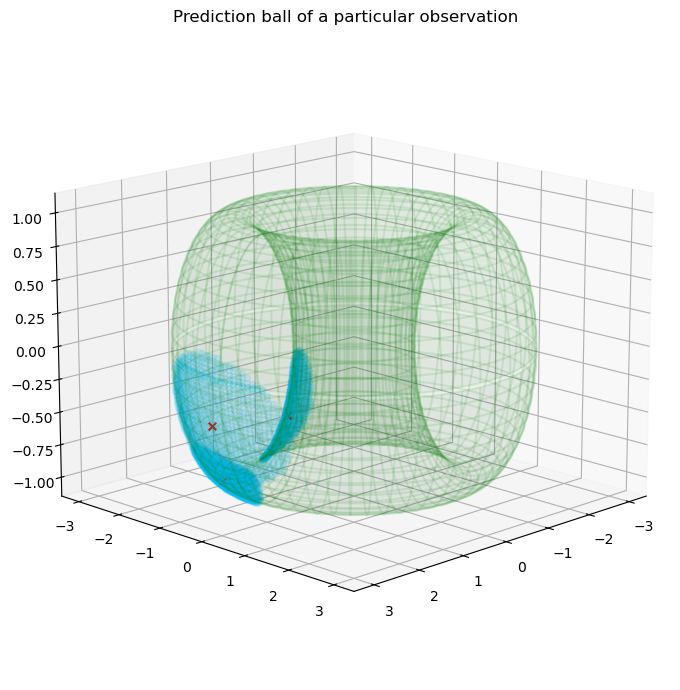

In [31]:
fig=plt.figure(figsize=(12,7))
ax=plt.axes(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)

# Plot OOB balls
plot_OOB_balls_T2(predictions=forest_predictions.data, 
               indices_to_plot=list(range(3)), 
               Dalpha=Dalpha, 
               ax=ax)

ax.set_title('Prediction ball of a particular observation')
ax.view_init(elev=15, azim=45)
plt.tight_layout()
plt.show()

### Tests FrechetMean on product manifolds